In [21]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import KFold, train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

We start off question 2 by first writing some helper functions

In [24]:
def polynomial(degrees, x_cv, y_cv, x_train, y_train):
    '''
    runs a polynomial regression and returns MSE of the model given a k
    '''
    polynomial = make_pipeline(PolynomialFeatures(degrees), Ridge())
    y_predict = polynomial.fit(x_train, y_train).predict(x_cv)
    mse = mean_squared_error(y_cv, y_predict)
    
    return mse

In [3]:
def kNN(k, x_cv, y_cv, x_train, y_train):
    '''
    runs a k-NN regression and returns the MSE of the model given a k
    
    k - number of points (tuning parameter)
    x_cv - data points to test (use cross validation data)
    y_cv - data points to check error (also cross validation data)
    x_train - input variables
    y_train - target variable
    '''
    knn = KNeighborsRegressor(k, weights='uniform')
    y_predict = knn.fit(x_train, y_train).predict(x_cv)
    mse = mean_squared_error(y_cv, y_predict)
    
    return mse

In [117]:
def tree(leaves, x_cv, y_cv, x_train, y_train):
    '''
    runs a regression tree and returns the MSE of the model given a number of leaves
    
    leaves - number of leaves to have (tuning parameter)
    x_cv - data points to test (use cross validation data)
    y_cv - data points to check error (also cross validation data)
    x_train - input variables
    y_train - target variable
    '''
    regressor = DecisionTreeRegressor(random_state=0, max_leaf_nodes=leaves)
    y_predict = regressor.fit(x_train, y_train).predict(x_cv)
    mse = mean_squared_error(y_cv, y_predict)
    
    return mse

## 2.1

Check to see if a used car salesman is trying to scam you, etc.

## 2.2

In [11]:
carsdf = pd.read_csv("UsedCars.csv")
carsnp = carsdf.values
training_set, testing_set = train_test_split(carsnp, test_size=0.25, random_state=0)

## 2.3

the coefficient for mileage is -0.337798
the intercept is 55438.601012
mse is 124281428.121389


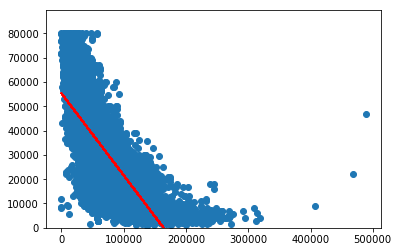

In [114]:
# price column
price_train = training_set[:, [0]]
price_test = testing_set[:, [0]]
# mileage column
mileage_train = training_set[:, [3]]
mileage_test = testing_set[:, [3]]

#linear regression model
linear = LinearRegression()
linear.fit(mileage_train, price_train)
print("the coefficient for mileage is %f" % linear.coef_)
print("the intercept is %f" % linear.intercept_)

#plot
y_predict = linear.predict(mileage_train)
print("mse is %f" % mean_squared_error(price_train, y_predict))
plt.scatter(mileage_train, price_train)
plt.plot(mileage_train, y_predict, color='red')
plt.gca().set_ylim(bottom=0)
plt.show()

## 2.4

The optimal polynomial degree is 7
MSE is 89876901.721073


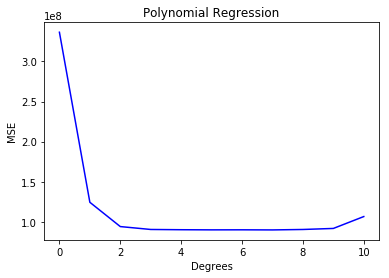

In [122]:
# variables to keep track of results
mse_plot = [0] * 11
degrees = list(range(11))


# k-fold for cross validation
kf = KFold(n_splits=5, shuffle=True, random_state=0)
folds = kf.split(mileage_train, price_train) # this generates the 5 folds

for fold in folds:
    train_index = list(fold[0])
    cv_index = list(fold[1])
    x_train = mileage_train[train_index, :]
    y_train = price_train[train_index, :]
    x_cv = mileage_train[cv_index, :]
    y_cv = price_train[cv_index, :]
    
    for d in degrees:
        mse_temp = polynomial(d, x_cv, y_cv, x_train, y_train)
        mse_plot[d] = mse_plot[d] + mse_temp

best_degree = min(mse_plot)
for i in range(11):
    if best_degree == mse_plot[i]:
        best_degree = i
    mse_plot[i] = mse_plot[i] / 5

print("The optimal polynomial degree is %i" % best_degree)
print("MSE is %f" % mse_plot[best_degree])
plt.plot(degrees, mse_plot, color='blue')
plt.title("Polynomial Regression")
plt.xlabel("Degrees")
plt.ylabel("MSE")
plt.show()

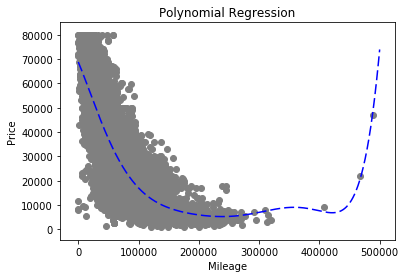

In [50]:
X = np.linspace(0, 500000, 15047)[:, np.newaxis]

model = make_pipeline(PolynomialFeatures(7), Ridge())
model.fit(mileage_train, price_train)
y_plot = model.predict(X)
plt.plot(X, y_plot, color='blue', linestyle='--', dashes=(5, 2))
plt.scatter(mileage_train, price_train, color='grey')
plt.title("Polynomial Regression")
plt.xlabel("Mileage")
plt.ylabel("Price")
plt.show()

## 2.5

running the k-NN regression first

The optimal k value is 460
MSE is 90161604.079432


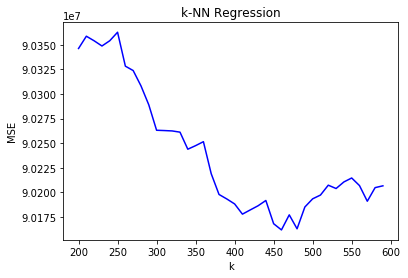

In [120]:
# variables to keep track of results
mse_plot = [0] * 40
k = list(range(200, 600, 10))

# k-fold for cross validation
kf = KFold(n_splits=5, shuffle=True, random_state=0)
folds = kf.split(mileage_train, price_train) # this generates the 5 folds

for fold in folds:
    train_index = list(fold[0])
    cv_index = list(fold[1])
    x_train = mileage_train[train_index, :]
    y_train = price_train[train_index, :]
    x_cv = mileage_train[cv_index, :]
    y_cv = price_train[cv_index, :]
    
    for i in k:
        mse_temp = kNN(i, x_cv, y_cv, x_train, y_train)
        mse_plot[(i-200)//10] = mse_plot[(i-200)//10] + mse_temp

best_k = min(mse_plot)
for i in range(40):
    if best_k == mse_plot[i]:
        best_k = i
    mse_plot[i] = mse_plot[i] / 5

print("The optimal k value is %i" % ((best_k * 10) + 200))
print("MSE is %f" % mse_plot[best_k])
plt.plot(k, mse_plot, color='blue')
plt.title("k-NN Regression")
plt.xlabel("k")
plt.ylabel("MSE")
plt.show()

now running the tree regression

The optimal number of leaves is 22
MSE is 92404429.960590


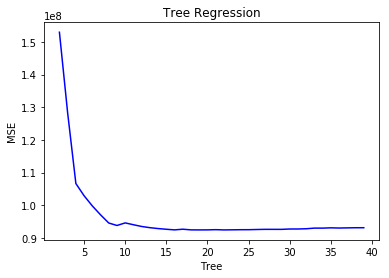

In [119]:
# variables to keep track of results
mse_plot = [0] * 38
leaves = list(range(2, 40))


# k-fold for cross validation
kf = KFold(n_splits=5, shuffle=True, random_state=0)
folds = kf.split(mileage_train, price_train) # this generates the 5 folds

for fold in folds:
    train_index = list(fold[0])
    cv_index = list(fold[1])
    x_train = mileage_train[train_index, :]
    y_train = price_train[train_index, :]
    x_cv = mileage_train[cv_index, :]
    y_cv = price_train[cv_index, :]
    
    for l in leaves:
        mse_temp = tree(l, x_cv, y_cv, x_train, y_train)
        mse_plot[l-2] = mse_plot[l-2] + mse_temp

best_leave = min(mse_plot)
for i in range(38):
    if best_leave == mse_plot[i]:
        best_leave = i
    mse_plot[i] = mse_plot[i] / 5

print("The optimal number of leaves is %i" % (best_leave + 2))
print("MSE is %f" % mse_plot[best_leave])
plt.plot(leaves, mse_plot, color='blue')
plt.title("Tree Regression")
plt.xlabel("Tree")
plt.ylabel("MSE")
plt.show()

training all of the models using optimal parameters and the entire training data set

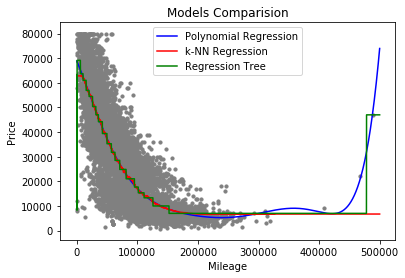

In [113]:
X = np.linspace(0, 500000, 15047)[:, np.newaxis]

poly = make_pipeline(PolynomialFeatures(7), Ridge()).fit(mileage_train, price_train)
poly_pred = poly.predict(X)

knn = KNeighborsRegressor(n_neighbors=460).fit(mileage_train, price_train)
knn_pred = knn.predict(X)

tree = DecisionTreeRegressor(random_state=0, max_leaf_nodes=22).fit(mileage_train, price_train)
tree_pred = tree.predict(X)

plt.plot(X, poly_pred, color='blue', label='Polynomial Regression')
plt.plot(X, knn_pred, color='red', label='k-NN Regression')
plt.plot(X, tree_pred, color='green', label='Regression Tree')
plt.scatter(mileage_train, price_train, s=10, color="grey")
plt.xlabel("Mileage")
plt.ylabel("Price")
plt.title("Models Comparision")
plt.legend()
plt.show()

In [118]:
# we can now also test the optimal training models on our actual testing data
print("MSE for optimal polynomial regression: %f" % polynomial(7, mileage_test, price_test, mileage_train, price_train))
print("MSE for optimal k-NN Regression: %f" % kNN(460, mileage_test, price_test, mileage_train, price_train))
print("MSE for optimal regression tree: %f" % tree(22, mileage_test, price_test, mileage_train, price_train))

MSE for optimal polynomial regression: 89845913.643445
MSE for optimal k-NN Regression: 89901547.282905
MSE for optimal regression tree: 91424699.068134
